In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from fsa import FSA

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


In [3]:
y = torch.tensor(np.loadtxt("c:/datasets/uci/gisette/gisette_train.labels", delimiter=','))
x = torch.tensor(np.loadtxt("c:/datasets/uci/gisette/gisette_train.data"))
yt = torch.tensor(np.loadtxt("c:/datasets/uci/gisette/gisette_valid.labels", delimiter=','))
xt = torch.tensor(np.loadtxt("c:/datasets/uci/gisette/gisette_valid.data"))
print(x.shape,y.shape)
x=x.to(device)
y=y.to(device)
xt=xt.to(device)
yt=yt.to(device)

torch.Size([6000, 5000]) torch.Size([6000])


In [4]:
sx=torch.std(x,axis=0)
x=x[:,sx!=0]
xt=xt[:,sx!=0]
print(x.shape)
mx=torch.mean(x,axis=0)
sx=torch.std(x,axis=0)
print(mx.shape)
x=(x-mx)/sx
xt=(xt-mx)/sx

torch.Size([6000, 4955])
torch.Size([4955])


AUC: train 0.998


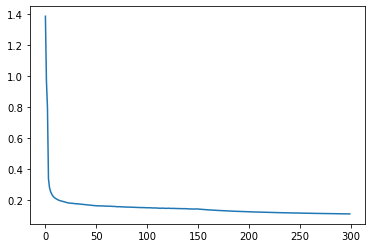

In [8]:
from sklearn.metrics import roc_auc_score
clf=FSA(100)
l=clf.fit(x,y,device)
plt.plot(l)
with torch.no_grad():
    py=clf.predict(x).cpu()
    print("AUC: train %.3f" % roc_auc_score(y.cpu(),py))

In [10]:
with torch.no_grad():
    pyt=clf.predict(xt).cpu()
print("AUC test %.3f" % roc_auc_score(yt.cpu(),pyt))
print(clf.idx)

AUC test 0.996
tensor([  60,  211,  264,  335,  345,  451,  463,  506,  513,  549,  552,  574,
         652,  724,  727,  751,  899, 1013, 1019, 1040, 1058, 1085, 1119, 1202,
        1218, 1226, 1260, 1266, 1323, 1360, 1511, 1621, 1644, 1763, 1780, 1799,
        1876, 1907, 1919, 1931, 1979, 2081, 2203, 2215, 2281, 2313, 2332, 2427,
        2467, 2594, 2653, 2689, 2715, 2786, 2804, 2811, 2817, 2867, 2884, 2973,
        3034, 3046, 3091, 3236, 3271, 3282, 3294, 3327, 3406, 3430, 3509, 3559,
        3620, 3708, 3717, 3799, 3813, 3936, 4054, 4068, 4073, 4117, 4142, 4225,
        4237, 4327, 4344, 4366, 4381, 4423, 4464, 4510, 4532, 4647, 4792, 4832,
        4860, 4881, 4919, 4946], device='cuda:0')
